<a href="https://colab.research.google.com/github/ShefikaBenjaminH/215008065.github.io/blob/main/Portfolio_Optmization%2C_Financial_modelling_and_Trading_systems_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparing the stock data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv("drive/MyDrive/Portfolio diversification/all_stocks_5yr.csv")

In [3]:
df["Name"]=df["Name"].str.strip()

In [4]:
remove_d = dict(df.groupby(["Name"]).count()["close"].sort_values())
list1 = []
for i,v in remove_d.items():
  if v < 1259:
    list1.append(i)
  else:
    pass

In [5]:
list1_array = np.array(list1)
list1_array.shape

(35,)

In [6]:
df_even = df.set_index("Name").drop(list1_array)
df_even.head()

,date,open,high,low,close,volume
Name,,,,,,
AAL,2013-02-08,15.07,15.12,14.63,14.75,8407500
AAL,2013-02-11,14.89,15.01,14.26,14.46,8882000
AAL,2013-02-12,14.45,14.51,14.10,14.27,8126000
AAL,2013-02-13,14.30,14.94,14.25,14.66,10259500
AAL,2013-02-14,14.94,14.96,13.16,13.99,31879900


In [7]:
df_even.index.unique()

Index(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=470)

In [8]:
stock_l = list(df_even.index.unique())
#stock_l

In [9]:
datafr_stocks = pd.DataFrame()
for name, group in df_even.groupby(["Name"]):
  for i in stock_l:
    ind_ = int(stock_l.index(i))
    if i == name:
      colum1 = df_even.groupby(["Name"]).get_group(i)["close"].values
      datafr_stocks[i] = colum1
    else:
      pass

<ipython-input-9-f1dba551e2af>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datafr_stocks[i] = colum1


In [10]:
datafr_stocks.index = df[df.Name == "A"].date.values

In [11]:
datafr_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


#**Selecting 5 stocks or assets that are less correlated to be part of the portfolio (minimum risk and high returns)**

**Variance**

The varaince of an investment shows how volatile a stock is.

In [12]:
df1 = datafr_stocks.copy()
df1.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [13]:
#df1.index = pd.to_datetime(df1.index)

In [14]:
#variance of all stocks

all_stocks_Variance = df1.pct_change().apply(lambda x: np.log(1+x)).var()

In [15]:
#sort all the stock from the lowest to highest to select the stock with the lowest variance

all_stocks_Variance.sort_values(ascending=True)

PEP    0.000071
WM     0.000077
RSG    0.000078
KO     0.000079
PG     0.000080
         ...   
WMB    0.000891
NI     0.000904
FCX    0.001150
AMD    0.001362
CHK    0.001727
Length: 470, dtype: float64

In [16]:
#Selecting the first 5 stock with the lowest variance

first_5_stocks = list(all_stocks_Variance.sort_values(ascending=True)[:5].index)
first_5_stocks

['PEP', 'WM', 'RSG', 'KO', 'PG']

**Correlation**

In [17]:
import seaborn as sns

In [18]:
to_drop = df1.corr()
to_drop

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,1.000000,0.215610,-0.494130,0.400368,0.509901,-0.203687,0.418756,0.396183,0.563067,0.528455,...,0.157963,0.713500,0.209477,0.151394,-0.286090,0.642727,-0.030249,0.235464,0.710644,0.374168
AAL,0.215610,1.000000,0.535983,0.835114,0.723115,0.773192,0.760103,0.630869,0.685319,0.693745,...,0.729636,0.553129,-0.309139,0.665504,0.008729,0.641955,0.218472,0.772007,0.519378,0.695370
AAP,-0.494130,0.535983,1.000000,0.264125,0.131630,0.701997,0.163286,0.196554,0.091777,0.105304,...,0.328782,-0.104707,-0.230396,0.469657,0.239541,0.040747,0.248917,0.499423,-0.136549,0.186245
AAPL,0.400368,0.835114,0.264125,1.000000,0.887866,0.673544,0.894304,0.848683,0.906094,0.914892,...,0.838297,0.762623,-0.525019,0.768427,-0.355464,0.831831,0.249553,0.778762,0.755852,0.928463
ABBV,0.509901,0.723115,0.131630,0.887866,1.000000,0.544060,0.921130,0.852036,0.897021,0.850391,...,0.618735,0.771599,-0.369390,0.707035,-0.312927,0.871420,0.379140,0.719369,0.748906,0.898333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.642727,0.641955,0.040747,0.831831,0.871420,0.296269,0.724411,0.924409,0.959576,0.911156,...,0.605684,0.910391,-0.305999,0.768094,-0.529267,1.000000,0.188057,0.717970,0.850119,0.894304
YUM,-0.030249,0.218472,0.248917,0.249553,0.379140,0.457085,0.423444,0.223105,0.177472,0.133534,...,0.065711,0.036854,-0.032145,0.229950,0.208164,0.188057,1.000000,0.458629,-0.062778,0.248900
ZBH,0.235464,0.772007,0.499423,0.778762,0.719369,0.673967,0.676768,0.712794,0.719086,0.697958,...,0.639411,0.559097,-0.260664,0.789335,-0.120766,0.717970,0.458629,1.000000,0.470557,0.754990
ZION,0.710644,0.519378,-0.136549,0.755852,0.748906,0.179722,0.655322,0.772011,0.847317,0.900543,...,0.611191,0.905506,-0.294837,0.532389,-0.613285,0.850119,-0.062778,0.470557,1.000000,0.780981


In [19]:
to_drop11 = [column for column in to_drop.columns if any(to_drop[column] < 0)]
np.array(to_drop11).shape

(470,)

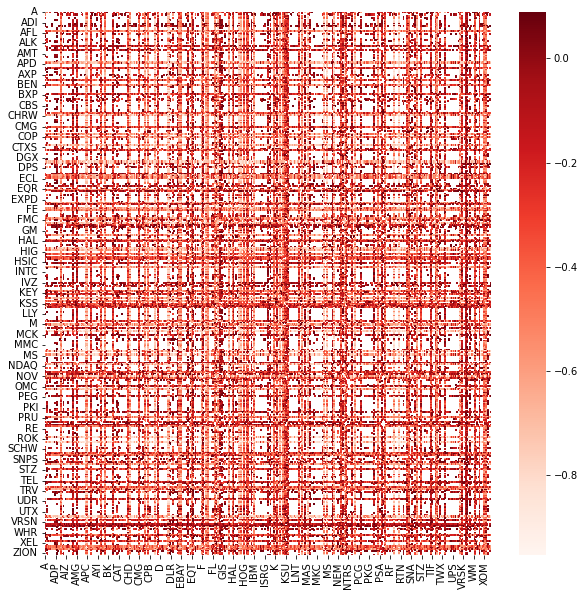

In [20]:
dfCorr = df1.corr()
filteredDf = dfCorr[(dfCorr <= 0.09)]
plt.figure(figsize=(10,10))
sns.heatmap(filteredDf, cmap="Reds")
plt.show()

Selcting 5 **less correlated** stocks from the heatmap:

**KORS**
**KR**	
**KSS**	
**KSU**	
**KO**

In [25]:
df_5_less_correlated =  df1[["KORS", 'KR', 'KSS','KSU','KO']] #KO
df_5_less_correlated.head()


,KORS,KR,KSS,KSU,KO
2013-02-08,57.10,14.100,46.01,95.09,38.77
2013-02-11,57.00,14.195,46.11,95.36,38.61
2013-02-12,62.00,14.270,46.06,95.87,37.56
2013-02-13,61.35,14.230,46.60,97.36,37.21
2013-02-14,61.67,14.120,46.98,97.61,36.84


#**Building an optimal risky portfolio, minimum variance portfolio, effecient frontier**


Now that i have selected 5 assets that are less correlated as part of my portfolio, its time to create a optimal risky portfolio

Before that, i need to define the weight of each asset in the portfolio, calculate the expected return, **minimum variance portfolio**, **optmial risky portfolio** and finaly **effecient frontier**.

**Covariance matrix**

Measuring the direct relationship between assets/stocks in terms of their returns:



*   Positive covariance means two assets are moving together interms of their returns
*   Negative covariance means two assest are moving in opposite direction in terms of their rtuens.



In [26]:
COV_matrix = df_5_less_correlated.pct_change().apply(lambda x: np.log(1+x)).cov() #There is a small covariance between the selected assets
COV_matrix

,KORS,KR,KSS,KSU,KO
KORS,0.000538,0.000030,0.000115,0.000074,0.000016
KR,0.000030,0.000248,0.000076,0.000045,0.000025
KSS,0.000115,0.000076,0.000444,0.000053,0.000017
KSU,0.000074,0.000045,0.000053,0.000289,0.000041
KO,0.000016,0.000025,0.000017,0.000041,0.000079


**Correlation matrix**

Correlation ranges from -1 to 1.

A correlation of -1 means negative relation, i.e, if correlation between Asset
A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset
A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

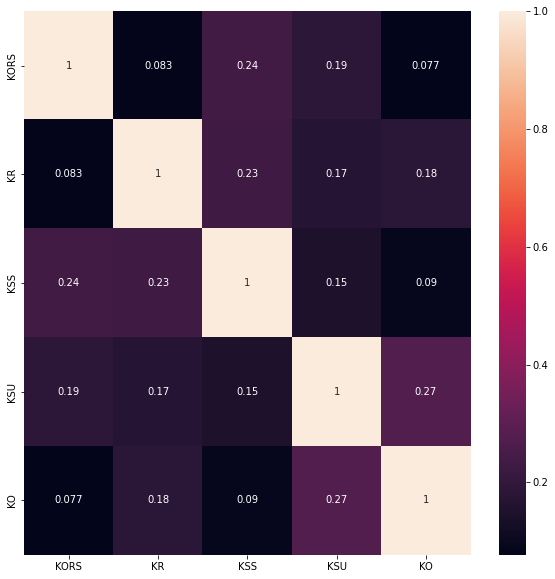

In [28]:
dfCorr = df_5_less_correlated.pct_change().apply(lambda x: np.log(1+x)).corr()
#filteredDf = dfCorr[(dfCorr <= 0.09)]
plt.figure(figsize=(10,10))
sns.heatmap(dfCorr, annot=True)
plt.show()

**Portfolio Variance**

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:


$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$


Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 5) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.


The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.


For this purpose, let’s define a random list of weights for all 5 assets. Remember that sum of weights should always be 1.

In [29]:
df_5_less_correlated.columns

Index(['KORS', 'KR', 'KSS', 'KSU', 'KO'], dtype='object')

In [30]:
# Randomly assigning weight to each assets in to calculate the portfolio's variance

w = {'KORS': 0.1, 'KR': 0.2, 'KSS': 0.4, 'KSU': 0.2, 'KO':0.1}

But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

In [31]:
#The portfolio risk is defined by its variance as calculated below:

port_var = dfCorr.mul(w,axis=0).mul(w,axis=1).sum().sum()
port_var

0.39058784303250516

**Portfolio expected returns**

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.

The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.

If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [32]:
df_5_less_correlated.index = pd.to_datetime(df_5_less_correlated.index)

In [33]:
# Yearly returns for individual assets

ind_er = df_5_less_correlated.resample('Y', axis=0).last().pct_change().mean() #there is a negative return by KSU
ind_er

KORS    0.009227
KR      0.120100
KSS     0.030221
KSU    -0.001673
KO      0.016496
dtype: float64

**Portfolio returns**

In [34]:
w = [0.1, 0.2, 0.4, 0.2,0.1]

port_er = (w*ind_er).sum()
port_er

0.03834605794905429

**Effiecient frontior for 5 portfolios**

But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [35]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.

ann_sd = df_5_less_correlated.pct_change().apply(lambda x:np.log(1+x)).std().apply(lambda x:x*np.sqrt(250))
ann_sd

KORS    0.366886
KR      0.248961
KSS     0.333302
KSU     0.268795
KO      0.140749
dtype: float64

In [36]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ["Volatility", "Returns"]
assets

,Volatility,Returns
KORS,0.009227,0.366886
KR,0.120100,0.248961
KSS,0.030221,0.333302
KSU,-0.001673,0.268795
KO,0.016496,0.140749


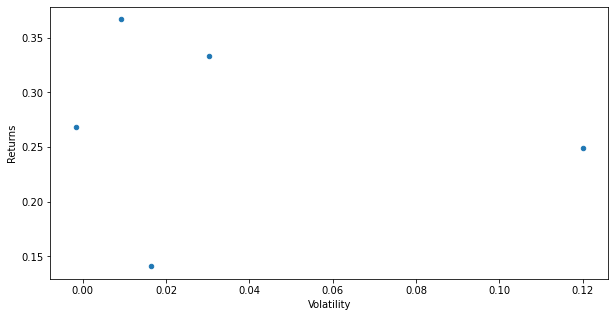

In [37]:
# Plot efficient frontier for 5 stocks (annualised)

assets.plot.scatter(x="Volatility", y="Returns", figsize=[10,5])

**Effecient frontier for 10000 portfolios**

In [38]:
df2 = df_5_less_correlated.copy()

In [39]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [40]:
num_assets = len(df2.columns)
num_portfolios = 100000

In [41]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = COV_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [42]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [43]:
for counter, symbol in enumerate(df2.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [44]:
portfolios  = pd.DataFrame(data)
portfolios.tail() # Dataframe of the 10000 portfolios created

,Returns,Volatility,KORS weight,KR weight,KSS weight,KSU weight,KO weight
99995,0.047664,0.147039,0.191834,0.296542,0.137235,0.002414,0.371975
99996,0.018408,0.216078,0.295195,0.023311,0.408614,0.218238,0.054641
99997,0.034628,0.157682,0.243406,0.214354,0.102601,0.204453,0.235186
99998,0.031985,0.168474,0.274969,0.186422,0.145799,0.210678,0.182133
99999,0.047631,0.146410,0.047639,0.290190,0.224583,0.091678,0.345910


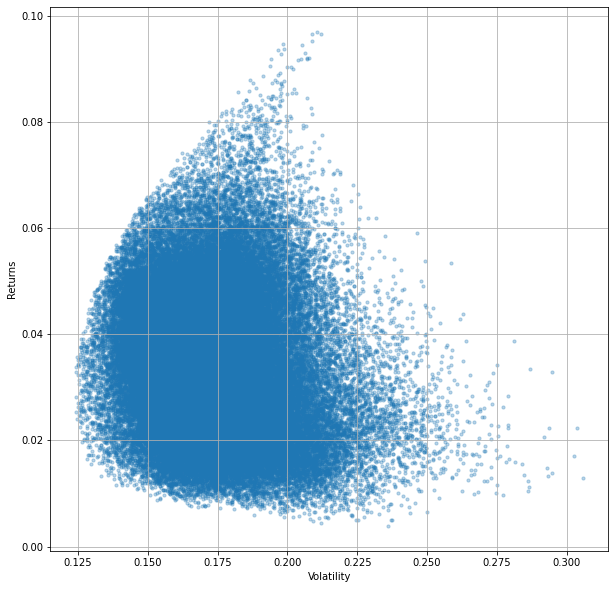

In [45]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

**Selecting the best weighted portfolio amongst 10000 portfolios**


Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.


The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.


On this graph, you can also see the combination of weights that will give you all possible combinations:


Minimum volatility (left most point)

Maximum returns (top most point)

And everything in between.

In [46]:
min_vol_port = portfolios.iloc[portfolios["Volatility"].idxmin()] # idxmin() gives us the minimum value in the column specified. 
min_vol_port

Returns        0.033901
Volatility     0.124158
KORS weight    0.073816
KR weight      0.178400
KSS weight     0.053701
KSU weight     0.070351
KO weight      0.623731
Name: 59620, dtype: float64

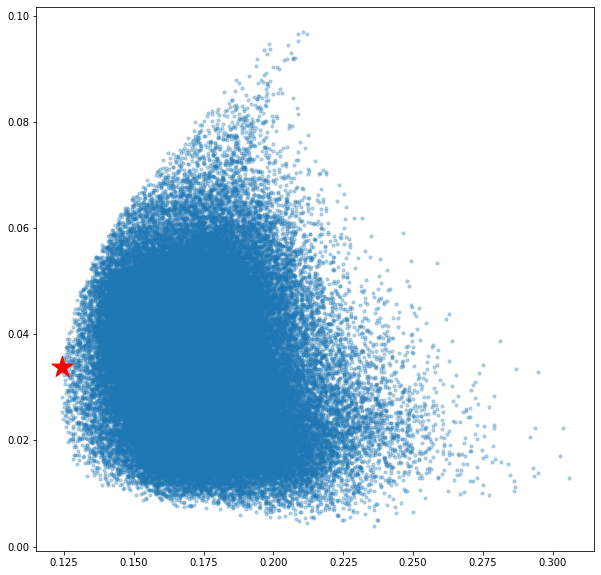

In [47]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?


This is done by using a parameter called the **Sharpe Ratio.**

**Sharpe Ratio**

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

**Optimal Risky Portfolio**


An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [48]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.094764
Volatility     0.198382
KORS weight    0.027791
KR weight      0.760289
KSS weight     0.002496
KSU weight     0.018303
KO weight      0.191121
Name: 39839, dtype: float64

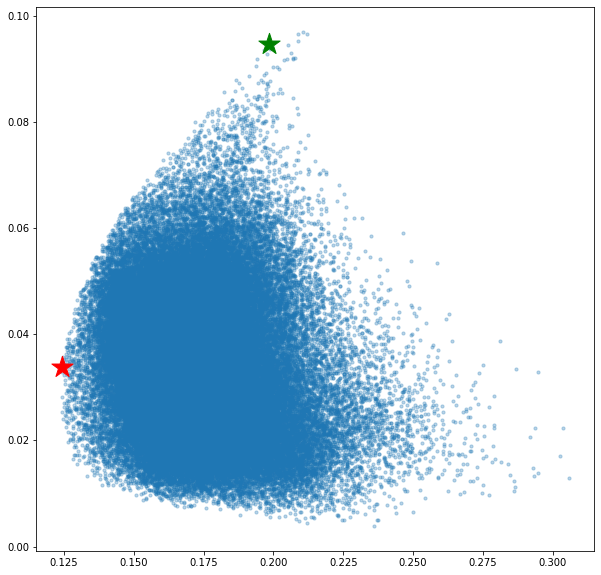

In [49]:
#We can plot this point too on the graph of efficient frontier.
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

#**Effecient frontier for 470 stocks**

In [50]:
df3 = df1.copy()
df3.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [51]:
df3.index = pd.to_datetime(df3.index)

In [52]:
p_ret1 = [] # Define an empty array for portfolio returns
p_vol1 = [] # Define an empty array for portfolio volatility
p_weights1 = [] # Define an empty array for asset weights

In [53]:
num_assets1 = len(df3.columns)
num_portfolios1 = 10000

In [54]:
# Yearly returns for all stocks

ind_er1 = df3.resample('Y', axis=0).last().pct_change().mean()

In [55]:
# Log of percentage change for the all the stocks

cov_matrix1 = df3.pct_change().apply(lambda x: np.log(1+x)).cov()

In [56]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets1)
    weights = weights/np.sum(weights)
    p_weights1.append(weights)
    returns = np.dot(weights, ind_er1) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret1.append(returns)
    var = cov_matrix1.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol1.append(ann_sd)   

In [57]:
data1 = {'Returns':p_ret1, 'Volatility':p_vol1}

In [58]:
for counter, symbol in enumerate(df3.columns.tolist()):
    #print(counter, symbol)
    data1[symbol+' weight'] = [w[counter] for w in p_weights1]

In [59]:
portfolios1  = pd.DataFrame(data1)
portfolios1.tail() # Dataframe of the 10000 portfolios created

,Returns,Volatility,A weight,AAL weight,AAP weight,AAPL weight,ABBV weight,ABC weight,ABT weight,ACN weight,...,XL weight,XLNX weight,XOM weight,XRAY weight,XRX weight,XYL weight,YUM weight,ZBH weight,ZION weight,ZTS weight
99995,0.088737,0.129418,0.000544,0.003653,0.003419,0.003567,0.000261,0.000107,0.003170,0.001643,...,0.000013,0.003782,0.003726,0.001732,0.002030,0.004072,0.004090,0.002771,0.001386,0.000610
99996,0.094802,0.127246,0.000364,0.000732,0.003091,0.001647,0.002169,0.001644,0.002476,0.003844,...,0.002296,0.003354,0.001214,0.002931,0.003413,0.000719,0.001687,0.000389,0.000255,0.002053
99997,0.086282,0.128912,0.002778,0.000444,0.002837,0.000316,0.000509,0.003093,0.003129,0.003369,...,0.000935,0.003094,0.003811,0.001520,0.000047,0.003050,0.003186,0.001607,0.002491,0.003071
99998,0.089000,0.126871,0.002669,0.000485,0.000572,0.000991,0.003128,0.001272,0.002466,0.000033,...,0.001475,0.000640,0.000407,0.000766,0.002468,0.002193,0.002028,0.002162,0.002809,0.000460
99999,0.088375,0.126654,0.002769,0.001215,0.002359,0.000463,0.002693,0.001750,0.004073,0.004047,...,0.000250,0.001879,0.002228,0.003714,0.000043,0.003197,0.002346,0.002442,0.002372,0.001640


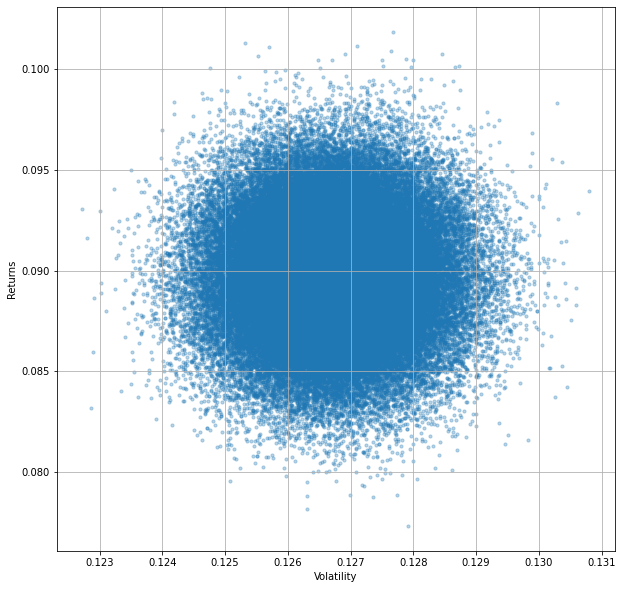

In [60]:
# Plot efficient frontier
portfolios1.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [119]:
min_vol_port1 = portfolios1.iloc[portfolios1["Volatility"].idxmin()] # idxmin() gives us the minimum value in the column specified. 
min_vol_port1

Returns        0.093068
Volatility     0.122722
A weight       0.003227
AAL weight     0.002481
AAP weight     0.002653
                 ...   
XYL weight     0.001002
YUM weight     0.001122
ZBH weight     0.001754
ZION weight    0.000130
ZTS weight     0.000626
Name: 52394, Length: 472, dtype: float64

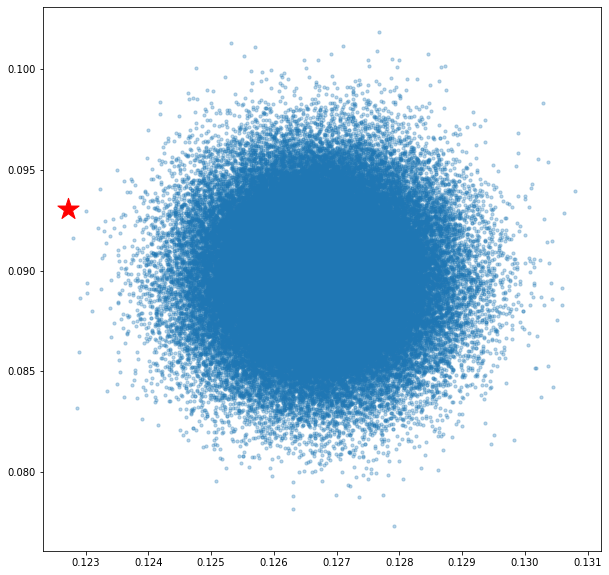

In [120]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios1['Volatility'], portfolios1['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port1[1], min_vol_port1[0], color='r', marker='*', s=500)

In [115]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port1 = portfolios1.iloc[((portfolios1['Returns']-rf)/portfolios1['Volatility']).idxmax()]
optimal_risky_port1

Returns        0.101331
Volatility     0.125322
A weight       0.001737
AAL weight     0.003341
AAP weight     0.003575
                 ...   
XYL weight     0.001977
YUM weight     0.000289
ZBH weight     0.000047
ZION weight    0.000151
ZTS weight     0.000600
Name: 48921, Length: 472, dtype: float64

#**Building a financial trading strategy/system using Exponential Moving average**

**What is Exponential moving average (EMA)**

An **exponential moving average (EMA)** is a type of moving average (MA) that places a greater **weight** and **significance** on the most recent data points. The exponential moving average is also referred to as the **exponentially weighted moving average**

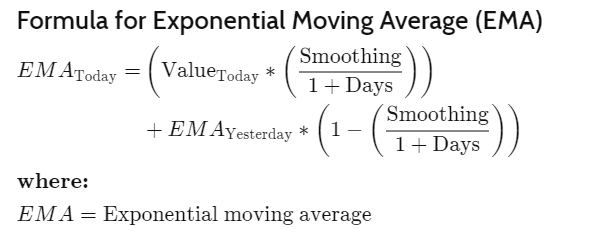


The trading systems consist of the following rules:

1. Plotting number of exponetial moving average to be used as list below:
**EMAsUsed**=[3,5,8,10,12,15,30,35,40,45,50,60]
2. If the market or price is bullish, wait for the EMAsEsed to cross each other from below and place a trade.
2. If the market or price is bearish, wait for the EMAsUsed to cross each other from above and place a trade.


In [92]:
df4 = df.copy()
df4.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [61]:
df_5_less_correlated.columns

Index(['KORS', 'KR', 'KSS', 'KSU', 'KO'], dtype='object')

Applaying the **financial trading systems** to **backtest** the following assets

1.   **KORS**
2.   **KR**
3.   **KSS**
4.   **KSU**
5.   **KO**

and see how they have performed between 2013 and 2018

In [62]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 4.0 MB 9.6 MB/s 
     |████████████████████████████████| 110 kB 55.2 MB/s 
     |████████████████████████████████| 112 kB 47.5 MB/s 
     |████████████████████████████████| 128 kB 65.6 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr

1.   **KORS**

In [98]:
df_KORS = df[df.Name == "KORS"]
df_KORS

,date,open,high,low,close,volume,Name
329766,2013-02-08,57.12,57.710,56.35,57.10,5130684,KORS
329767,2013-02-11,57.71,57.760,56.39,57.00,7116166,KORS
329768,2013-02-12,64.39,64.800,61.22,62.00,20877522,KORS
329769,2013-02-13,61.78,63.130,61.00,61.35,6350767,KORS
329770,2013-02-14,61.28,62.840,61.06,61.67,5750814,KORS
...,...,...,...,...,...,...,...
331020,2018-02-01,65.32,66.325,64.53,65.93,1847451,KORS
331021,2018-02-02,65.46,66.590,64.84,65.27,2476029,KORS
331022,2018-02-05,65.29,66.300,63.89,64.05,3274571,KORS
331023,2018-02-06,63.00,66.070,62.00,65.44,5059565,KORS


In [99]:
emasUsed=[3,5,8,10,12,15,30,35,40,45,50,60] #number of exponetial moving average to be used

ma = 50

smaString = "Sma_"+str(ma) #adding the 50 to Sma 

df_KORS[smaString] = df_KORS.iloc[:,4].rolling(window=ma).mean()

df_KORS.set_index('date', inplace=True)

#checking whether the closing value is above or below the average
for i in df_KORS.index:
    #print(df_KORS.iloc[:,4][i]) #printing the Adj Close
    pass

#OR
for i in df_KORS.index:
    #print(df_KORS['close'][i]) #printing the Adj Close
    pass

#OR
#comparing two values from ADJ and Mean and print higher or lower based on condition
numH=0
numC=0
for i in df_KORS.index:
    if (df_KORS['close'][i]>df_KORS[smaString][i]):
        #print("The close is higher") #price is going down and expecting selling signal
        numH+=1
    else:
        #print("The close is lower") #price is going up and expecting buying signal
        numC+=1
#print(str(numH)) #Total number of time price is greater than mean 
#print(str(numC)) #Total number of time price is less than mean

#create a for loop to go through emasUsed
#ewm stands for exponetial weighted moving average
for x in emasUsed:
    ema=x
    df_KORS["Ema_"+str(ema)] = round(df_KORS.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)

#print(df_KORS.head())

pos = 0 #determine whether we are entering a position /enter if it's 1 and don't enter if it's 0
num = 0 #keep track of the row that we are on
percentchange = [] #append the results of our trade in
for i in df_KORS.index:
    cmin=min(df_KORS["Ema_3"][i],df_KORS["Ema_5"][i],df_KORS["Ema_8"][i],df_KORS["Ema_10"][i],df_KORS["Ema_12"][i],df_KORS["Ema_15"][i])
    cmax=max(df_KORS["Ema_30"][i],df_KORS["Ema_35"][i],df_KORS["Ema_40"][i],df_KORS["Ema_40"][i],df_KORS["Ema_45"][i],df_KORS["Ema_50"][i],df_KORS["Ema_60"][i])
    
    close=df_KORS["close"][i]
    
    if (cmin>cmax):
        #print("Red White Blue")
        if(pos==0):
            bp=close
            pos=1
            #print("Buying now at "+str(bp))
        
    elif(cmin<cmax):
        #print("Blue White Red")
        if(pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    
    if(num==df_KORS["close"].count()-1 and pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    num+=1
    
#print(percentchange)


gains =0
losses=0
totalR=1


nl=0
ng=0
for i in percentchange:
    if(i>0):
        gains+=i
        ng+=1
    else:
        losses+=i
        nl+=1
    totalR=totalR*((i/100)+1)

totalR=round((totalR-1)*100,2)


if (ng>0):
    avgGain=gains/ng
    maxR=str(max(percentchange))
else:
    avgGain=0
    maxR="undefined"

if (nl>0):
    avgLoss=losses/nl
    maxR=str(min(percentchange))
    ratio = str(-avgGain/avgLoss)
else:
    avgLoss=0
    maxL="undefined"
    ratio="inf"

if(ng>0 or nl>0):
    battingAvg=ng/(ng+nl)
else:
    battingAvg=0

print()
print("Results for "+ "AAL" + " going back to "+str(df_KORS.index[0])+", Sample size: "+str(ng+nl)+ " trades")
print("EMAS used: "+str(emasUsed))
print("Batting Avg: "+str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+str(avgGain))
print("Average Loss: "+str(avgLoss))
print("Max Return: "+maxR)
#print("Max Loss: "+maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%")


Results for AAL going back to 2013-02-08, Sample size: 46 trades
EMAS used: [3, 5, 8, 10, 12, 15, 30, 35, 40, 45, 50, 60]
Batting Avg: 0.5652173913043478
Gain/loss ratio: 2.0338375570473217
Average Gain: 5.775741487899716
Average Loss: -2.8398243841483604
Max Return: -18.666446608351215
Total return over 46 trades: 126.22%


<ipython-input-99-3932ffc6b16f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KORS[smaString] = df_KORS.iloc[:,4].rolling(window=ma).mean()
<ipython-input-99-3932ffc6b16f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KORS["Ema_"+str(ema)] = round(df_KORS.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)


2.   **KR**

In [101]:
df_KR = df[df.Name == "KR"]
df_KR.head()

,date,open,high,low,close,volume,Name
332284,2013-02-08,14.030,14.1350,13.990,14.100,6722508,KR
332285,2013-02-11,14.215,14.3974,14.185,14.195,8946862,KR
332286,2013-02-12,14.195,14.3200,14.075,14.270,7079172,KR
332287,2013-02-13,14.250,14.3000,14.185,14.230,5036106,KR
332288,2013-02-14,14.155,14.2050,14.090,14.120,8497132,KR


In [102]:
emasUsed=[3,5,8,10,12,15,30,35,40,45,50,60] #number of exponetial moving average to be used

ma = 50

smaString = "Sma_"+str(ma) #adding the 50 to Sma 

df_KR[smaString] = df_KR.iloc[:,4].rolling(window=ma).mean()

df_KR.set_index('date', inplace=True)

#checking whether the closing value is above or below the average
for i in df_KR.index:
    #print(df_KR.iloc[:,4][i]) #printing the Adj Close
    pass

#OR
for i in df_KR.index:
    #print(df_KR['close'][i]) #printing the Adj Close
    pass

#OR
#comparing two values from ADJ and Mean and print higher or lower based on condition
numH=0
numC=0
for i in df_KR.index:
    if (df_KR['close'][i]>df_KR[smaString][i]):
        #print("The close is higher") #price is going down and expecting selling signal
        numH+=1
    else:
        #print("The close is lower") #price is going up and expecting buying signal
        numC+=1
#print(str(numH)) #Total number of time price is greater than mean 
#print(str(numC)) #Total number of time price is less than mean

#create a for loop to go through emasUsed
#ewm stands for exponetial weighted moving average
for x in emasUsed:
    ema=x
    df_KR["Ema_"+str(ema)] = round(df_KR.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)

#print(df_KR.head())

pos = 0 #determine whether we are entering a position /enter if it's 1 and don't enter if it's 0
num = 0 #keep track of the row that we are on
percentchange = [] #append the results of our trade in
for i in df_KR.index:
    cmin=min(df_KR["Ema_3"][i],df_KR["Ema_5"][i],df_KR["Ema_8"][i],df_KR["Ema_10"][i],df_KR["Ema_12"][i],df_KR["Ema_15"][i])
    cmax=max(df_KR["Ema_30"][i],df_KR["Ema_35"][i],df_KR["Ema_40"][i],df_KR["Ema_40"][i],df_KR["Ema_45"][i],df_KR["Ema_50"][i],df_KR["Ema_60"][i])
    
    close=df_KR["close"][i]
    
    if (cmin>cmax):
        #print("Red White Blue")
        if(pos==0):
            bp=close
            pos=1
            #print("Buying now at "+str(bp))
        
    elif(cmin<cmax):
        #print("Blue White Red")
        if(pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    
    if(num==df_KR["close"].count()-1 and pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    num+=1
    
#print(percentchange)


gains =0
losses=0
totalR=1


nl=0
ng=0
for i in percentchange:
    if(i>0):
        gains+=i
        ng+=1
    else:
        losses+=i
        nl+=1
    totalR=totalR*((i/100)+1)

totalR=round((totalR-1)*100,2)


if (ng>0):
    avgGain=gains/ng
    maxR=str(max(percentchange))
else:
    avgGain=0
    maxR="undefined"

if (nl>0):
    avgLoss=losses/nl
    maxR=str(min(percentchange))
    ratio = str(-avgGain/avgLoss)
else:
    avgLoss=0
    maxL="undefined"
    ratio="inf"

if(ng>0 or nl>0):
    battingAvg=ng/(ng+nl)
else:
    battingAvg=0

print()
print("Results for "+ "AAL" + " going back to "+str(df_KR.index[0])+", Sample size: "+str(ng+nl)+ " trades")
print("EMAS used: "+str(emasUsed))
print("Batting Avg: "+str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+str(avgGain))
print("Average Loss: "+str(avgLoss))
print("Max Return: "+maxR)
#print("Max Loss: "+maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%")


Results for AAL going back to 2013-02-08, Sample size: 82 trades
EMAS used: [3, 5, 8, 10, 12, 15, 30, 35, 40, 45, 50, 60]
Batting Avg: 0.6463414634146342
Gain/loss ratio: 0.9111674564711844
Average Gain: 2.1393492548406985
Average Loss: -2.3479210540794324
Max Return: -24.708624708624715
Total return over 82 trades: 46.45%


<ipython-input-102-85215e005556>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KR[smaString] = df_KR.iloc[:,4].rolling(window=ma).mean()
<ipython-input-102-85215e005556>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KR["Ema_"+str(ema)] = round(df_KR.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)


3.   **KSS**

In [103]:
df_KSS = df[df.Name == "KSS"]
df_KSS.head()

,date,open,high,low,close,volume,Name
333543,2013-02-08,45.97,46.16,45.62,46.01,2357080,KSS
333544,2013-02-11,46.10,46.34,45.78,46.11,2398335,KSS
333545,2013-02-12,46.00,46.26,45.97,46.06,1623736,KSS
333546,2013-02-13,46.19,46.61,46.08,46.60,2320457,KSS
333547,2013-02-14,46.50,47.16,46.49,46.98,2299006,KSS


In [104]:
emasUsed=[3,5,8,10,12,15,30,35,40,45,50,60] #number of exponetial moving average to be used

ma = 50

smaString = "Sma_"+str(ma) #adding the 50 to Sma 

df_KSS[smaString] = df_KSS.iloc[:,4].rolling(window=ma).mean()

df_KSS.set_index('date', inplace=True)

#checking whether the closing value is above or below the average
for i in df_KSS.index:
    #print(df_KSS.iloc[:,4][i]) #printing the Adj Close
    pass

#OR
for i in df_KSS.index:
    #print(df_KSS['close'][i]) #printing the Adj Close
    pass

#OR
#comparing two values from ADJ and Mean and print higher or lower based on condition
numH=0
numC=0
for i in df_KSS.index:
    if (df_KSS['close'][i]>df_KSS[smaString][i]):
        #print("The close is higher") #price is going down and expecting selling signal
        numH+=1
    else:
        #print("The close is lower") #price is going up and expecting buying signal
        numC+=1
#print(str(numH)) #Total number of time price is greater than mean 
#print(str(numC)) #Total number of time price is less than mean

#create a for loop to go through emasUsed
#ewm stands for exponetial weighted moving average
for x in emasUsed:
    ema=x
    df_KSS["Ema_"+str(ema)] = round(df_KSS.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)

#print(df_KSS.head())

pos = 0 #determine whether we are entering a position /enter if it's 1 and don't enter if it's 0
num = 0 #keep track of the row that we are on
percentchange = [] #append the results of our trade in
for i in df_KSS.index:
    cmin=min(df_KSS["Ema_3"][i],df_KSS["Ema_5"][i],df_KSS["Ema_8"][i],df_KSS["Ema_10"][i],df_KSS["Ema_12"][i],df_KSS["Ema_15"][i])
    cmax=max(df_KSS["Ema_30"][i],df_KSS["Ema_35"][i],df_KSS["Ema_40"][i],df_KSS["Ema_40"][i],df_KSS["Ema_45"][i],df_KSS["Ema_50"][i],df_KSS["Ema_60"][i])
    
    close=df_KSS["close"][i]
    
    if (cmin>cmax):
        #print("Red White Blue")
        if(pos==0):
            bp=close
            pos=1
            #print("Buying now at "+str(bp))
        
    elif(cmin<cmax):
        #print("Blue White Red")
        if(pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    
    if(num==df_KSS["close"].count()-1 and pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    num+=1
    
#print(percentchange)


gains =0
losses=0
totalR=1


nl=0
ng=0
for i in percentchange:
    if(i>0):
        gains+=i
        ng+=1
    else:
        losses+=i
        nl+=1
    totalR=totalR*((i/100)+1)

totalR=round((totalR-1)*100,2)


if (ng>0):
    avgGain=gains/ng
    maxR=str(max(percentchange))
else:
    avgGain=0
    maxR="undefined"

if (nl>0):
    avgLoss=losses/nl
    maxR=str(min(percentchange))
    ratio = str(-avgGain/avgLoss)
else:
    avgLoss=0
    maxL="undefined"
    ratio="inf"

if(ng>0 or nl>0):
    battingAvg=ng/(ng+nl)
else:
    battingAvg=0

print()
print("Results for "+ "AAL" + " going back to "+str(df_KSS.index[0])+", Sample size: "+str(ng+nl)+ " trades")
print("EMAS used: "+str(emasUsed))
print("Batting Avg: "+str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+str(avgGain))
print("Average Loss: "+str(avgLoss))
print("Max Return: "+maxR)
#print("Max Loss: "+maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%")


Results for AAL going back to 2013-02-08, Sample size: 68 trades
EMAS used: [3, 5, 8, 10, 12, 15, 30, 35, 40, 45, 50, 60]
Batting Avg: 0.5441176470588235
Gain/loss ratio: 1.0231121724533676
Average Gain: 3.8340291751379634
Average Loss: -3.7474181994572198
Max Return: -15.902439024390247
Total return over 68 trades: 14.76%


<ipython-input-104-117a662230d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KSS[smaString] = df_KSS.iloc[:,4].rolling(window=ma).mean()
<ipython-input-104-117a662230d8>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KSS["Ema_"+str(ema)] = round(df_KSS.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)


4.   **KSU**

In [105]:
df_KSU = df[df.Name == "KSU"]
df_KSU.head()

,date,open,high,low,close,volume,Name
334802,2013-02-08,95.54,95.8895,93.90,95.09,640499,KSU
334803,2013-02-11,95.16,95.5800,94.33,95.36,678744,KSU
334804,2013-02-12,95.50,96.2500,95.16,95.87,575235,KSU
334805,2013-02-13,95.88,97.6300,95.88,97.36,1083953,KSU
334806,2013-02-14,96.84,97.7600,96.43,97.61,664738,KSU


In [106]:
emasUsed=[3,5,8,10,12,15,30,35,40,45,50,60] #number of exponetial moving average to be used

ma = 50

smaString = "Sma_"+str(ma) #adding the 50 to Sma 

df_KSU[smaString] = df_KSU.iloc[:,4].rolling(window=ma).mean()

df_KSU.set_index('date', inplace=True)

#checking whether the closing value is above or below the average
for i in df_KSU.index:
    #print(df_KSU.iloc[:,4][i]) #printing the Adj Close
    pass

#OR
for i in df_KSU.index:
    #print(df_KSU['close'][i]) #printing the Adj Close
    pass

#OR
#comparing two values from ADJ and Mean and print higher or lower based on condition
numH=0
numC=0
for i in df_KSU.index:
    if (df_KSU['close'][i]>df_KSU[smaString][i]):
        #print("The close is higher") #price is going down and expecting selling signal
        numH+=1
    else:
        #print("The close is lower") #price is going up and expecting buying signal
        numC+=1
#print(str(numH)) #Total number of time price is greater than mean 
#print(str(numC)) #Total number of time price is less than mean

#create a for loop to go through emasUsed
#ewm stands for exponetial weighted moving average
for x in emasUsed:
    ema=x
    df_KSU["Ema_"+str(ema)] = round(df_KSU.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)

#print(df_KSU.head())

pos = 0 #determine whether we are entering a position /enter if it's 1 and don't enter if it's 0
num = 0 #keep track of the row that we are on
percentchange = [] #append the results of our trade in
for i in df_KSU.index:
    cmin=min(df_KSU["Ema_3"][i],df_KSU["Ema_5"][i],df_KSU["Ema_8"][i],df_KSU["Ema_10"][i],df_KSU["Ema_12"][i],df_KSU["Ema_15"][i])
    cmax=max(df_KSU["Ema_30"][i],df_KSU["Ema_35"][i],df_KSU["Ema_40"][i],df_KSU["Ema_40"][i],df_KSU["Ema_45"][i],df_KSU["Ema_50"][i],df_KSU["Ema_60"][i])
    
    close=df_KSU["close"][i]
    
    if (cmin>cmax):
        #print("Red White Blue")
        if(pos==0):
            bp=close
            pos=1
            #print("Buying now at "+str(bp))
        
    elif(cmin<cmax):
        #print("Blue White Red")
        if(pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    
    if(num==df_KSU["close"].count()-1 and pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    num+=1
    
#print(percentchange)


gains =0
losses=0
totalR=1


nl=0
ng=0
for i in percentchange:
    if(i>0):
        gains+=i
        ng+=1
    else:
        losses+=i
        nl+=1
    totalR=totalR*((i/100)+1)

totalR=round((totalR-1)*100,2)


if (ng>0):
    avgGain=gains/ng
    maxR=str(max(percentchange))
else:
    avgGain=0
    maxR="undefined"

if (nl>0):
    avgLoss=losses/nl
    maxR=str(min(percentchange))
    ratio = str(-avgGain/avgLoss)
else:
    avgLoss=0
    maxL="undefined"
    ratio="inf"

if(ng>0 or nl>0):
    battingAvg=ng/(ng+nl)
else:
    battingAvg=0

print()
print("Results for "+ "AAL" + " going back to "+str(df_KSU.index[0])+", Sample size: "+str(ng+nl)+ " trades")
print("EMAS used: "+str(emasUsed))
print("Batting Avg: "+str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+str(avgGain))
print("Average Loss: "+str(avgLoss))
print("Max Return: "+maxR)
#print("Max Loss: "+maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%")


Results for AAL going back to 2013-02-08, Sample size: 62 trades
EMAS used: [3, 5, 8, 10, 12, 15, 30, 35, 40, 45, 50, 60]
Batting Avg: 0.6129032258064516
Gain/loss ratio: 0.7886517526510529
Average Gain: 2.45680328993553
Average Loss: -3.1151941039590487
Max Return: -14.135945690470052
Total return over 62 trades: 14.82%


<ipython-input-106-2716fe4c1daf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KSU[smaString] = df_KSU.iloc[:,4].rolling(window=ma).mean()
<ipython-input-106-2716fe4c1daf>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KSU["Ema_"+str(ema)] = round(df_KSU.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)


5.   **KO**

In [110]:
df_KO = df[df.Name == "KO"]
df_KO.head()

,date,open,high,low,close,volume,Name
331025,2013-02-08,38.85,38.94,38.60,38.77,12308001,KO
331026,2013-02-11,38.71,38.83,38.41,38.61,12159872,KO
331027,2013-02-12,38.11,38.16,37.28,37.56,30700481,KO
331028,2013-02-13,37.67,37.94,37.01,37.21,19942647,KO
331029,2013-02-14,37.24,37.51,36.70,36.84,22748290,KO


In [111]:
emasUsed=[3,5,8,10,12,15,30,35,40,45,50,60] #number of exponetial moving average to be used

ma = 50

smaString = "Sma_"+str(ma) #adding the 50 to Sma 

df_KO[smaString] = df_KO.iloc[:,4].rolling(window=ma).mean()

df_KO.set_index('date', inplace=True)

#checking whether the closing value is above or below the average
for i in df_KO.index:
    #print(df_KO.iloc[:,4][i]) #printing the Adj Close
    pass

#OR
for i in df_KO.index:
    #print(df_KO['close'][i]) #printing the Adj Close
    pass

#OR
#comparing two values from ADJ and Mean and print higher or lower based on condition
numH=0
numC=0
for i in df_KO.index:
    if (df_KO['close'][i]>df_KO[smaString][i]):
        #print("The close is higher") #price is going down and expecting selling signal
        numH+=1
    else:
        #print("The close is lower") #price is going up and expecting buying signal
        numC+=1
#print(str(numH)) #Total number of time price is greater than mean 
#print(str(numC)) #Total number of time price is less than mean

#create a for loop to go through emasUsed
#ewm stands for exponetial weighted moving average
for x in emasUsed:
    ema=x
    df_KO["Ema_"+str(ema)] = round(df_KO.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)

#print(df_KO.head())

pos = 0 #determine whether we are entering a position /enter if it's 1 and don't enter if it's 0
num = 0 #keep track of the row that we are on
percentchange = [] #append the results of our trade in
for i in df_KO.index:
    cmin=min(df_KO["Ema_3"][i],df_KO["Ema_5"][i],df_KO["Ema_8"][i],df_KO["Ema_10"][i],df_KO["Ema_12"][i],df_KO["Ema_15"][i])
    cmax=max(df_KO["Ema_30"][i],df_KO["Ema_35"][i],df_KO["Ema_40"][i],df_KO["Ema_40"][i],df_KO["Ema_45"][i],df_KO["Ema_50"][i],df_KO["Ema_60"][i])
    
    close=df_KO["close"][i]
    
    if (cmin>cmax):
        #print("Red White Blue")
        if(pos==0):
            bp=close
            pos=1
            #print("Buying now at "+str(bp))
        
    elif(cmin<cmax):
        #print("Blue White Red")
        if(pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    
    if(num==df_KO["close"].count()-1 and pos==1):
            pos=0
            sp=close
            #print("Selling now at "+str(sp))
            pc=(sp/bp-1)*100
            percentchange.append(pc)
    num+=1
    
#print(percentchange)


gains =0
losses=0
totalR=1


nl=0
ng=0
for i in percentchange:
    if(i>0):
        gains+=i
        ng+=1
    else:
        losses+=i
        nl+=1
    totalR=totalR*((i/100)+1)

totalR=round((totalR-1)*100,2)


if (ng>0):
    avgGain=gains/ng
    maxR=str(max(percentchange))
else:
    avgGain=0
    maxR="undefined"

if (nl>0):
    avgLoss=losses/nl
    maxR=str(min(percentchange))
    ratio = str(-avgGain/avgLoss)
else:
    avgLoss=0
    maxL="undefined"
    ratio="inf"

if(ng>0 or nl>0):
    battingAvg=ng/(ng+nl)
else:
    battingAvg=0

print()
print("Results for "+ "AAL" + " going back to "+str(df_KO.index[0])+", Sample size: "+str(ng+nl)+ " trades")
print("EMAS used: "+str(emasUsed))
print("Batting Avg: "+str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+str(avgGain))
print("Average Loss: "+str(avgLoss))
print("Max Return: "+maxR)
#print("Max Loss: "+maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%")


Results for AAL going back to 2013-02-08, Sample size: 86 trades
EMAS used: [3, 5, 8, 10, 12, 15, 30, 35, 40, 45, 50, 60]
Batting Avg: 0.5697674418604651
Gain/loss ratio: 1.4063259020468457
Average Gain: 1.2749200242397363
Average Loss: -0.9065608635837156
Max Return: -4.643697838647542
Total return over 86 trades: 32.11%


<ipython-input-111-8b243b2ce57c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KO[smaString] = df_KO.iloc[:,4].rolling(window=ma).mean()
<ipython-input-111-8b243b2ce57c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KO["Ema_"+str(ema)] = round(df_KO.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)


#**Conclusions**

If we have **KORS**, **KR**, **KSS**, **KSU**, **KO** as part of our portfolio with weight as indicated below:

*   **KORS weight**: 0.073816
*   **KR   weight**: 0.178400
*   **KSS  weight**: 0.053701
*   **KSU  weight**: 0.070351
*   **KO   weight**: 0.623731


If we implement our **trading systems** using various **financial modlling** like **EMAs** as described and shown in each asset, we will have the following return to each assets as indicated below:


*   **KORS** Total return over 46 trades: **126.22%**
*   **KR**   Total return over 82 trades: **46.45%**
*   **KSS**  Total return over 68 trades: **14.76%**
*   **KSU**  Total return over 62 trades: **14.82%**
*   **KO**   Total return over 86 trades: **32.11%**

To find the total **expected return** of this **portfolio**, multiply the weight with the return for each assets as indicated below:

expect_return_portfolio = (0.073816 * 1.2622) + (0.178400 * 0.4645) + (0.053701*0.1476) + (0.070351 * 0.1482) + (0.623731 * 0.3211)

Expected return for this portfolio is **0.3946696651**

